# 実践問題3 Y=aX+b の期待値と分散

## (1) 確率変数Yの期待値と分散

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas as pd
import scipy.stats as stats

from matplotlib import pyplot as plt
import seaborn as sns; sns.set() # sns.set() ==> グラフの見た目をseabornに合わせる

In [56]:
n = 1000  # シミュレーションのサンプルサイズ
loc = 37/10
scale = 201/100
X = np.random.normal(loc=loc, scale=scale, size=n)

In [57]:
# Xの標本平均、標本分散、ヒストグラム
meanX = np.mean(X)
varX = np.var(X)
print('mean={}, var={}'.format(meanX, varX))

mean=3.6742519235776343, var=4.030148943784356


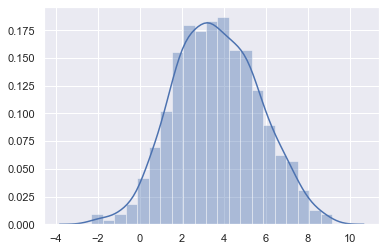

In [58]:
sns.distplot(X);

In [59]:
def qqplot(dist):
    stats.probplot(dist, dist="norm", plot=plt)
    plt.show()

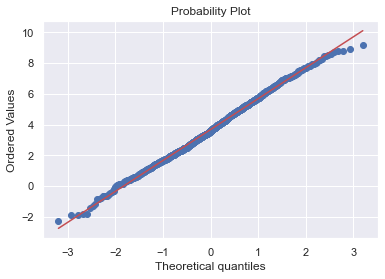

In [60]:
# 正規性を見るためのQ-Qプロット
qqplot(X)

In [61]:
# Yの標本平均、標本分散、ヒストグラム
Y = 10*(X-3)
meanY = np.mean(Y)
varY = np.var(Y)
print('mean={}, var={}'.format(meanY, varY))


mean=6.742519235776347, var=403.0148943784356


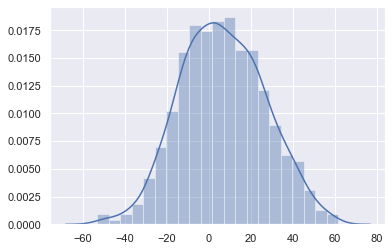

In [62]:
sns.distplot(Y);

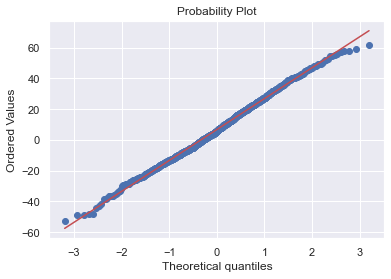

In [63]:
# 正規性を見るためのQ-Qプロット
qqplot(Y)

## (2) 確率変数Zの期待値と分散

In [64]:
# sigma = 1.0に固定
myu = np.arange(start=-10,stop=11,step=0.1)
Z = X-myu/1.0
# df_myu = pd.DataFrame(myu, np.mean(X-myu/1.0))
# sns.scatterplot(df_myu)

ValueError: operands could not be broadcast together with shapes (1000,) (210,) 

In [ ]:
myu